# NBA 2022 Champion
## NBA league
<ul>
<li> There are 30 teams in the NBA league and they are divided into East and West Conference (15 teams on each)
<li> Each team will play 82 matches in total throughout the entire season
<li> The top 8 teams from each conference will advance to the playoff according to their win-lose record (the picture below shows the playoff tree)
<li> Each series will be held in the form of best of 7
</ul>

<img src= "NBA2022_Playoff(1).png">

## Task
<ul>
<li> There are 4 teams left currently in this NBA playoff, 2 from each conference <br>
<li> Our task will be calculating the probability of winning the championship for these 4 teams <br>

<li> We need to consider the following points: <br>
    - the previous matchups between each teams during the season <br>
    - the 82 games win/lose record for each teams <br>
    - the teams' performance during the playoff until the current stage <br>
<ul>

In [7]:
import pandas as pd

df = pd.read_csv('Warriors_Mavericks.csv')
df = df.set_index('Match')
df

,Date,Teams,Score,Warriors,Mavericks
Match,,,,,
1,06/01/2022,Mavericks - Warriors,99 - 82,0,1
2,26/01/2022,Warriors - Mavericks,130 - 92,1,0
3,28/02/2022,Warriors - Mavericks,101 - 107,0,1
4,04/03/2022,Mavericks - Warriors,122 - 113,0,1
5,19/05/2022,Warriors - Mavericks,112 - 87,1,0
6,21/05/2022,Warriors - Mavericks,126 - 117,1,0
7,23/05/2022,Mavericks - Warriors,100 - 109,1,0


In [15]:
from cmdstanpy import CmdStanModel
import arviz as az
import numpy as np
import scipy.stats as stats
import pandas as pd
import statistics as s 

import matplotlib.pyplot as plt
import matplotlib as mpl

In [14]:
Warriors_N = df['Warriors'].count()
Warriors_y = df['Warriors']

In [17]:
code1 = CmdStanModel(stan_file='Teams.stan')
data1 = code1.sample(data={'N': Warriors_N, 'y':Warriors_y})

INFO:cmdstanpy:found newer exe file, not recompiling
INFO:cmdstanpy:CmdStan start processing


chain 1 |          | 00:00 Status

chain 2 |          | 00:00 Status

chain 3 |          | 00:00 Status

chain 4 |          | 00:00 Status

INFO:cmdstanpy:CmdStan done processing.


In [18]:
d = data1.draws_pd()
d

,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,theta
0,-6.28041,0.863722,0.975467,2.0,3.0,0.0,7.03875,0.543630
1,-6.24764,0.807944,0.975467,2.0,3.0,0.0,7.48285,0.495911
2,-6.23232,0.972059,0.975467,2.0,3.0,0.0,6.41083,0.526038
3,-6.23232,0.714551,0.975467,1.0,3.0,0.0,7.40116,0.526038
4,-6.60030,0.914965,0.975467,1.0,3.0,0.0,6.63663,0.589094
...,...,...,...,...,...,...,...,...
3995,-6.72875,0.913982,0.924135,1.0,1.0,0.0,6.72892,0.600807
3996,-6.84524,0.991297,0.924135,2.0,3.0,0.0,6.94049,0.610178
3997,-7.13952,0.979366,0.924135,2.0,3.0,0.0,7.22319,0.630461
3998,-7.12193,1.000000,0.924135,1.0,1.0,0.0,7.34078,0.629352


(array([  8.,  10.,  28.,  49., 119., 220., 273., 387., 512., 522., 460.,
        445., 343., 267., 170., 104.,  45.,  28.,   8.,   2.]),
 array([0.238202 , 0.2666476, 0.2950932, 0.3235388, 0.3519844, 0.38043  ,
        0.4088756, 0.4373212, 0.4657668, 0.4942124, 0.522658 , 0.5511036,
        0.5795492, 0.6079948, 0.6364404, 0.664886 , 0.6933316, 0.7217772,
        0.7502228, 0.7786684, 0.807114 ]),
 <BarContainer object of 20 artists>)

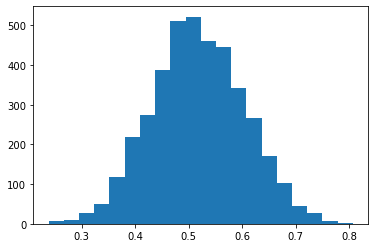

In [19]:
theta = data1.stan_variable('theta')
plt.hist(theta, bins=20)